# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

Harmonikus: $$ F(x) = -kx $$
Negyedrendű: $$ F(x) = -kx^3 $$
Lennard-Jones $$ F(x) = -12*V_0 \left[ \left( \frac{x_0^6}{x^7} \right) - \left( \frac{x_0^{12}}{x^{13}} \right) \right] $$

## 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

Populating the interactive namespace from numpy and matplotlib


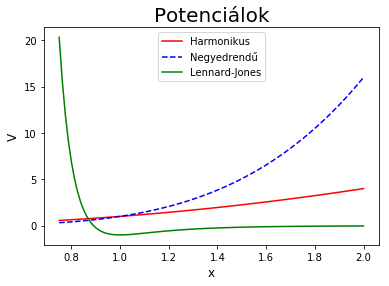

In [1]:
# megoldás helye
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

def harm_pot(x,V_0=1):
    return V_0*x**2
def negyed_pot(x,V_0=1):
    return V_0*x**4
def LJ_pot(x,V_0=1,x_0=1):
    return V_0*((x_0/x)**12-2*(x_0/x)**6)

x=linspace(0.75,2,100)
plt.plot(x,harm_pot(x),color='red',label='Harmonikus')
plt.plot(x,negyed_pot(x),color='blue',linestyle='dashed',label='Negyedrendű')
plt.plot(x,LJ_pot(x),color='green',label='Lennard-Jones')
xlabel('x',fontsize=12)
ylabel('V',fontsize=12)
title('Potenciálok',fontsize=20)
plt.legend()



In [2]:
def F_harm(x,V_0=1):
    return -V_0*x
def F_negyed(x,V_0=1):
    return -V_0*x**3
def F_LJ(x,V_0=1,x_0=1):
    return -12*V_0*((x_0**6/x**7)-(x_0**12/x**13))

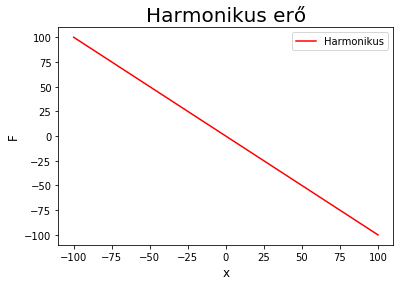

In [3]:
x=linspace(-100,100,10000)

plt.plot(x,F_harm(x),color='red',label='Harmonikus')
xlabel('x',fontsize=12)
ylabel('F',fontsize=12)
title('Harmonikus erő',fontsize=20)
legend()

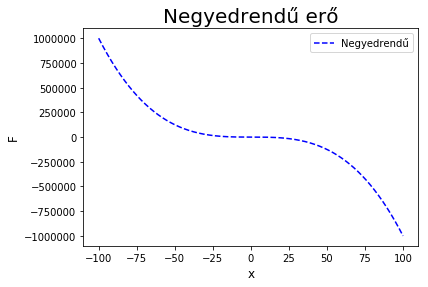

In [4]:
plt.plot(x,F_negyed(x),color='blue',linestyle='dashed',label='Negyedrendű')
xlabel('x',fontsize=12)
ylabel('F',fontsize=12)
title('Negyedrendű erő',fontsize=20)
legend()

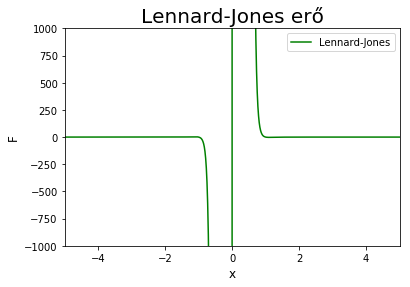

In [5]:
plt.plot(x,F_LJ(x),color='green',label='Lennard-Jones')
xlim(-5,5)
ylim(-1000,1000)
xlabel('x',fontsize=12)
ylabel('F',fontsize=12)
title('Lennard-Jones erő',fontsize=20)
legend()

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

In [6]:
# megoldás helye
from scipy.integrate import RK45
#RK45 Dormand Prince
def harm_oszcillator(t,y):
    V0=1
    m=1
    return (y[1],F_harm(y[0],V0)/m)
def Lennard_Jones(t,y):
    V0=1
    x0=1
    m=1
    return (y[1],F_LJ(y[0],V0,x0)/m)

rk_harm=RK45(harm_oszcillator,0,(0,1),50, rtol=1e-3, max_step=1)
rk_LJ=RK45(Lennard_Jones,0,(1,1),50, rtol=1e-3, max_step=1)

In [7]:
t_harm=[]
xv_harm=[]
while True:
    try:
        rk_harm.step()
    except:
        break
    t_harm.append(rk_harm.t)
    xv_harm.append(rk_harm.y)
t_harm=array(t_harm)
xv_harm=array(xv_harm)

    
#delta_t_harm=t_harm[1:] - t_harm[:-1]

In [8]:
t_LJ=[]
xv_LJ=[]
while True:
    try:
        rk_LJ.step()
    except:
        break
    t_LJ.append(rk_LJ.t)
    xv_LJ.append(rk_LJ.y)
t_LJ=array(t_LJ)
xv_LJ=array(xv_LJ)

    
#delta_t_LJ=t_LJ[1:] - t_LJ[:-1]    

In [9]:
def E_harm(xv_harm,m=1):
    return 1/2*m*xv_harm[:,1]**2+harm_pot(xv_harm[:,0])
def E_LJ(xv_LJ,m=1):
    return 1/2*m*xv_LJ[:,1]**2+LJ_pot(xv_LJ[:,0])

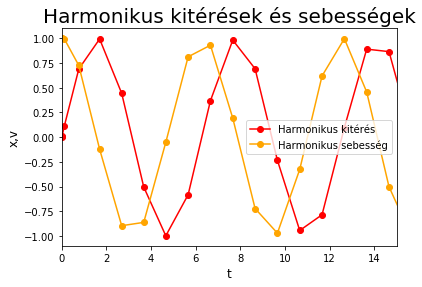

In [10]:
plot(t_harm[:],xv_harm[:,0],marker="o",color='red',label='Harmonikus kitérés')
plot(t_harm[:],xv_harm[:,1], marker="o",color='orange',label='Harmonikus sebesség')
xlim(0,15)
xlabel('t',fontsize=12)
ylabel('x,v',fontsize=12)
title('Harmonikus kitérések és sebességek',fontsize=20)
legend()

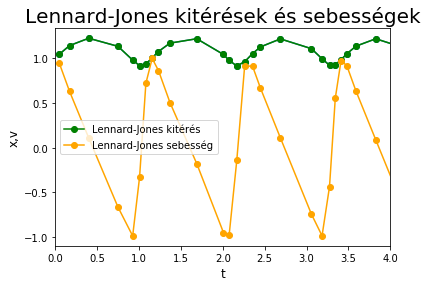

In [11]:
plot(t_LJ[:100],xv_LJ[:100,0], marker="o")
plot(t_LJ[:],xv_LJ[:,0],marker="o",color='green',label='Lennard-Jones kitérés')
plot(t_LJ[:],xv_LJ[:,1], marker="o",color='orange',label='Lennard-Jones sebesség')
xlim(0,4)
xlabel('t',fontsize=12)
ylabel('x,v',fontsize=12)
title('Lennard-Jones kitérések és sebességek',fontsize=20)
legend()

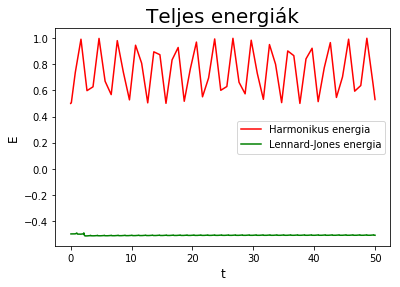

In [12]:
plot(t_harm,E_harm(xv_harm),color='red',label='Harmonikus energia')
plot(t_LJ,E_LJ(xv_LJ),color='green',label='Lennard-Jones energia')
xlabel('t',fontsize=12)
ylabel('E',fontsize=12)
title('Teljes energiák',fontsize=20)
legend()

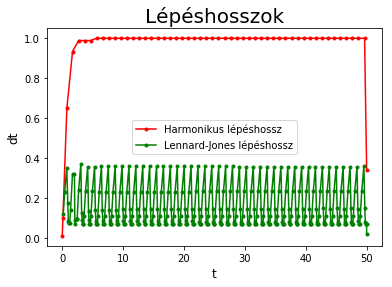

In [13]:
plt.plot(t_harm[1:],t_harm[1:]-t_harm[:-1],color='red',label='Harmonikus lépéshossz',marker=".")
plot(t_LJ[1:],t_LJ[1:]-t_LJ[:-1],color='green',label='Lennard-Jones lépéshossz',marker=".")
xlabel('t',fontsize=12)
ylabel('dt',fontsize=12)
title('Lépéshosszok',fontsize=20)
legend()

## 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

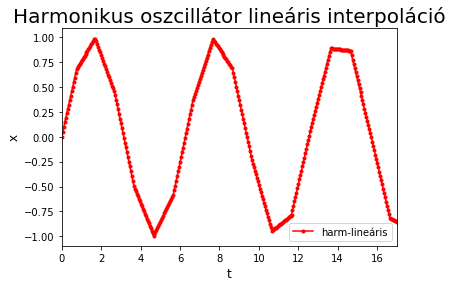

In [14]:
# megoldás helye
from scipy.interpolate import interp1d

f_harm_lin = interp1d(t_harm,xv_harm[:,0],kind='linear')
t_harm_lin_uj=np.linspace(t_harm.min(),t_harm.max(),1000)
f_harm_lin_uj=f_harm_lin(t_harm_lin_uj)
plt.plot(t_harm_lin_uj,f_harm_lin_uj,color='red',marker='.',label='harm-lineáris')
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
plt.xlim(0,17)
plt.title('Harmonikus oszcillátor lineáris interpoláció',fontsize=20)
legend()

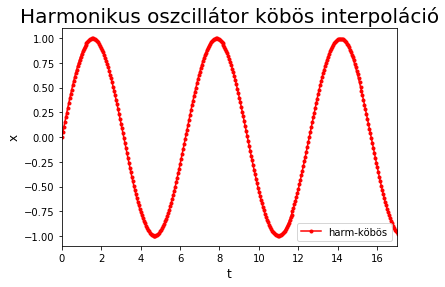

In [15]:
f_harm_cub = interp1d(t_harm,xv_harm[:,0],kind='cubic')
f_harm_cub_uj=f_harm_cub(t_harm_lin_uj)
plt.plot(t_harm_lin_uj,f_harm_cub_uj,color='red',marker='.',label='harm-köbös')
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
plt.xlim(0,17)
plt.title('Harmonikus oszcillátor köbös interpoláció',fontsize=20)
legend()

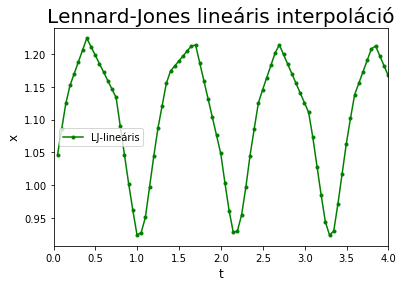

In [16]:
f_LJ_lin = interp1d(t_LJ,xv_LJ[:,0],kind='linear')
t_LJ_lin_uj=np.linspace(t_LJ.min(),t_LJ.max(),1000)
f_LJ_lin_uj=f_LJ_lin(t_LJ_lin_uj)
plt.plot(t_LJ_lin_uj,f_LJ_lin_uj,color='green',marker='.',label='LJ-lineáris')
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
plt.xlim(0,4)
plt.title('Lennard-Jones lineáris interpoláció',fontsize=20)
legend()

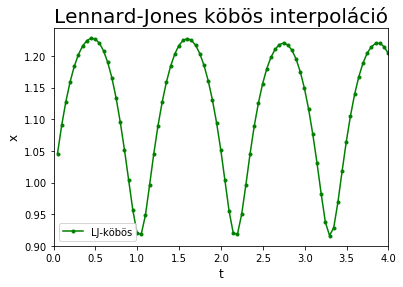

In [17]:
f_LJ_cub = interp1d(t_LJ,xv_LJ[:,0],kind='cubic')
f_LJ_cub_uj=f_LJ_cub(t_LJ_lin_uj)
plt.plot(t_LJ_lin_uj,f_LJ_cub_uj,color='green',marker='.',label='LJ-köbös')
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
plt.xlim(0,4)
plt.title('Lennard-Jones köbös interpoláció',fontsize=20)
legend()

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

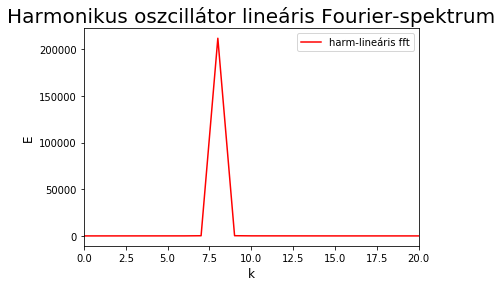

In [18]:
# megoldás helye
plt.plot(abs(numpy.fft.rfft(f_harm_lin_uj))**2,color='red',label='harm-lineáris fft')
plt.xlabel('k',fontsize=12)
plt.ylabel('E',fontsize=12)
plt.xlim(0,20)
plt.title('Harmonikus oszcillátor lineáris Fourier-spektrum',fontsize=20)
legend()

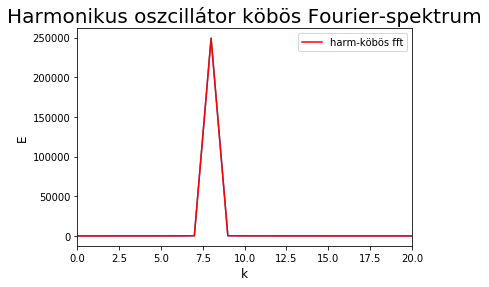

In [19]:
plt.plot(abs(numpy.fft.rfft(f_harm_cub_uj))**2)
plt.plot(abs(numpy.fft.rfft(f_harm_cub_uj))**2,color='red',label='harm-köbös fft')
plt.xlabel('k',fontsize=12)
plt.ylabel('E',fontsize=12)
plt.xlim(0,20)
plt.title('Harmonikus oszcillátor köbös Fourier-spektrum',fontsize=20)
legend()

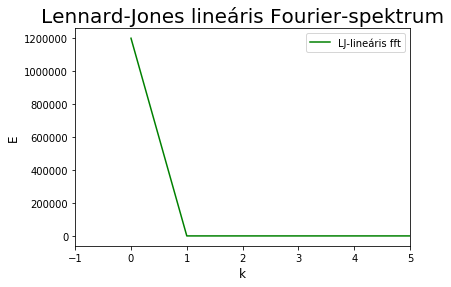

In [20]:
plt.plot(abs(numpy.fft.rfft(f_LJ_lin_uj))**2,color='green',label='LJ-lineáris fft')
plt.xlabel('k',fontsize=12)
plt.ylabel('E',fontsize=12)
plt.xlim(-1,5)
plt.title('Lennard-Jones lineáris Fourier-spektrum',fontsize=20)
legend()

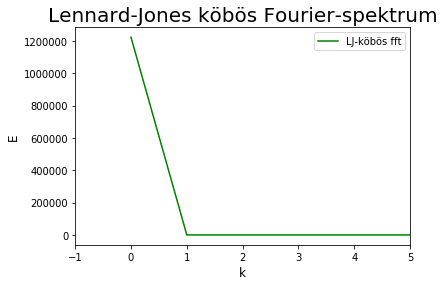

In [21]:
plt.plot(abs(numpy.fft.rfft(f_LJ_cub_uj))**2,color='green',label='LJ-köbös fft')
plt.xlabel('k',fontsize=12)
plt.ylabel('E',fontsize=12)
plt.xlim(-1,5)
plt.title('Lennard-Jones köbös Fourier-spektrum',fontsize=20)
legend()

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf